## Quiz 2 - Probability, Statistics (ლექცია 4, ლექცია 5) - 7 ქულა

იხილეთ LoanStatus.csv მონაცემთა ფაილი, რომელშიც მოცემულია კლიენტთა ინფორმაცია შემდეგი სვეტებით:

Loan ID - კლიენტის ID

Gender - სქესი

Married - დაქორზინებული არის თუ არა

Dependents - ოჯახის წევრების რაოდენობა, რომლის ფინანსურ მხარდაჭერასაც უზრუნველყოფს კლიენტი

Education - არის თუ არა უმაღლესი განათლების მქონე

Self_Employed - არის თუ არა თვითდასაქმებული

ApplicantIncome - კლიენტის შემოსავალი (per month)

LoanAmount  - სესხის რაოდენობა (ათასებში)

Loan_Amount_Term - სესხის ვადა

Credit_History - როგორი საკრედიტო ისტორია აქვს კლიენტს (1-კარგი, 0-ცუდი)

Property_Area - საცხოვრებელი და სამუშაო ადგილი

Loan_Status - სესხის გაცემის სტატუსი


## დავალება 1: აღწერილობითი სტატისტიკა  (1 ქულა)
ა) გახსენით ფაილი და დაბეჭდეთ აღწერილობითი სტატისტიკის მონაცემები თქვენთვის საინტერესო ველებისთვის, როგორიცაა საშუალო, მედიანა, მოდა, სტდ. გადახრა, ა.შ. (მოახდინეთ სიტყვიერი ინტერპრეტაცია);

ბ) დაითვალეთ თითოეულ სვეტში ცარიელი მნიშვნელობების რაოდენობა შესაბამისი ფუნქციით

In [1]:
import pandas as pd
import warnings

from scipy.stats import norm
warnings.filterwarnings("ignore")

In [52]:

dt = pd.read_csv('LoanStatus.csv')
print(dt)


## a) არჩეული სვეტების სტატისტიკის დაპრინტვა
columns = ['Loan_Status', 'ApplicantIncome']
print(dt[columns].describe())

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0               5849         NaN             360.0             1.

In [5]:
## b) ცარიელი მნიშვნელობების რაოდენობა თითოეულ სვეტში
print(dt.isna().sum())

Loan_ID              0
Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64


## დავალება 2:  ალბათობა (1 ქულა)
ა) დაითვალეთ, რა არის სესხის აღების ალბათობა Loan_Status-ის მიხედვით.

ბ) რა არის სესხის აღების ალბათობა, მაშინ როცა კლიენტს კარგი საკრედიტო ისტორია აქვს.

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [17]:
## a) სესხის აღების ალბათობა Loan_Status-ის მიხედვით
loan_approval_probability = dt['Loan_Status'].value_counts(normalize=True)['Y']
print(f"loan_approval_probability: {loan_approval_probability}")

loan_approval_probability: 0.6872964169381107


In [18]:
## b) სესხის აღების ალბათობა საკრედიტო ისტორიიდან გამომდინარე
credit_approval_probability = dt[dt['Credit_History'] == 1]['Loan_Status'].value_counts(normalize=True)['Y']
print(f"credit_approval_probability: {credit_approval_probability}")


credit_approval_probability: 0.7957894736842105


## დავალება 3: გრაფიკული წარმოდგენა (1 ქულა)
ა) seaborn.distplot ან seaborn.histplot() ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი გრაფიკი. ლინკი: https://seaborn.pydata.org/generated/seaborn.distplot.html

ბ) matplotlib.pyplot.hist ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი ჰისტოგრამი, რომელშიც bin-ების (ჰოსტოგრამაში ბლოკების) რაოდენობას თქვენ განსაზღვრავთ (მაგ. ჰისტოგრამაში 10 სვეტად წარმოადგინოთ მონაცემები.) იხ. დოკუმენტაცია შემდეგ ლინკზე: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

Future warnings-ების გამოსართავად ჩაწერეთ შემდეგი ბრძანებები:
import warnings
warnings.filterwarnings("ignore")

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

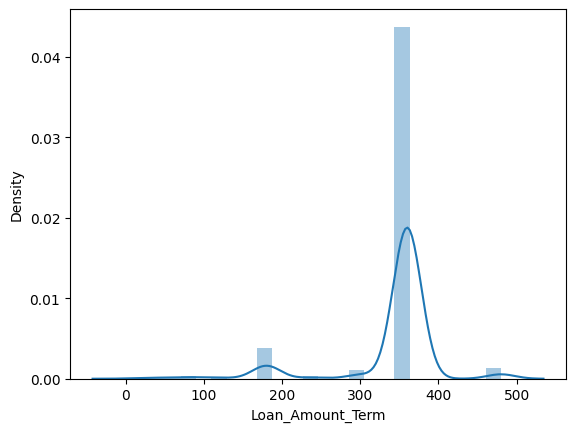

In [28]:
## a) გრაფიკი Loan_Amount_Term სვეტის
sns.distplot(dt['Loan_Amount_Term'].dropna())
plt.show()

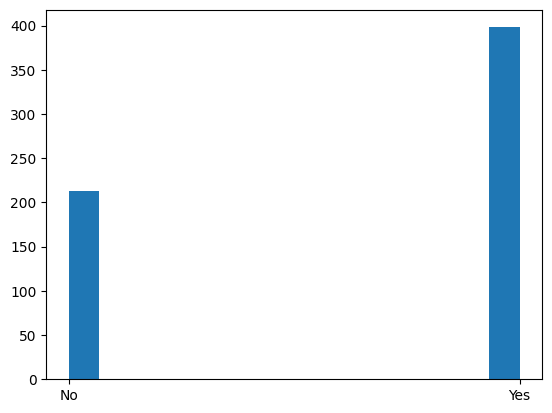

In [29]:
## b) Married სვეტის ჰისტოგრამი 15 ბლოკით

plt.hist(dt['Married'].dropna(), bins=15)
plt.show()

## დავალება 4:  კუმულაციური ალბათობა (Cumulative distribution function) - (1 ქულა)
დაითვალეთ შემდეგი კუმულაციური ალბათობა scipy.stats.norm.cdf() ფუნქციის გამოყენებით.
დაითვალეთ კლიენტების რამდენ პროცენტს აქვს შემოსავალი 2000 ევროზე ნაკლები ყოველთვიურად.
norm.cdf(x, mean_val, std_dev_val) ფუნქციის პირველი პარამეტრია სასაზღვრო მნიშვნელობა, მეორე- საშუალო, მესამე -სტდ. გადახრა.

#### მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია

In [19]:
from scipy.stats import norm

In [48]:
## პროცენტის გამოთვლა კუმულაციური ალბათობით იმ კლიენტებისა, ვისაც 2000ზე ნაკლები შემოსავალი აქვს

mean_loan_amount = dt['ApplicantIncome'].mean()
std_loan_amount = dt['ApplicantIncome'].std()
probability_less_than_2000 = norm.cdf(2000, mean_loan_amount, std_loan_amount)
print(f"probability less than 2000: {probability_less_than_2000}")

probability less than 2000: 0.28872328177095585


## დავალება 5: სტატისტიკა (1 ქულა)

ააგეთ 2 boxplot დიაგრამა seaborn.boxplot() ფუნქციის გამოყენებით რომელიმე ველის მიმართ.

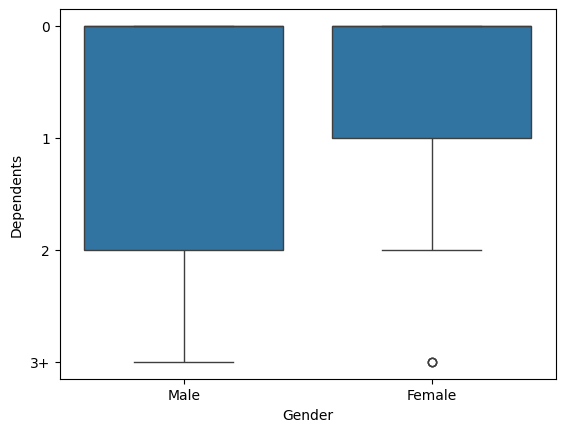

In [27]:
sns.boxplot(x='Gender', y='Dependents', data=dt)
plt.show()

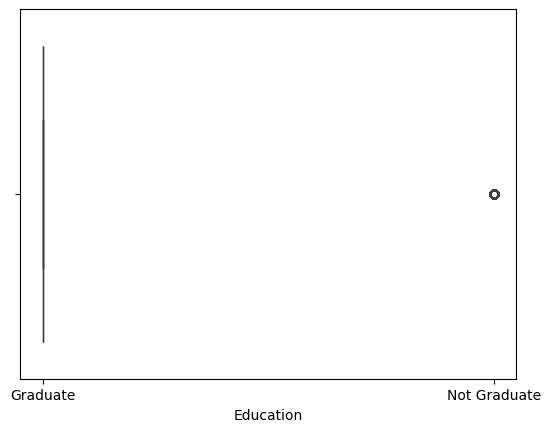

In [49]:
sns.boxplot(x=dt['Education'])
plt.show()

## დავალება 6: t-test (2 ქულა)
ა) გააკეთეთ t-test ანალიზი (One sample t-test)  რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_1samp ფუნქცია.

ბ) გააკეთეთ t-test ანალიზი (Two sample t-test) რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_ind ფუნქცია.

განსაზღვრეთ ნულოვანი და ალტერნატიული ჰიპოთეზა, გამოიყენეთ აღნიშნული ფუნქციები და მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია.

In [34]:
from scipy.stats import ttest_1samp

## a) გამოთვლა Loan_Amount_Term სვეტის საშუალო მაჩვენებლის და One sample t-test ანალიზის ჩვენება
from scipy.stats import ttest_1samp

t_stat_applicant_income, p_value_applicant_income = ttest_1samp(dt['Loan_Amount_Term'], dt['Loan_Amount_Term'].mean())
print(f"T-statistic for Applicant Income: {t_stat_applicant_income}, P-value for Applicant Income: {p_value_applicant_income}")


T-statistic for Applicant Income: nan, P-value for Applicant Income: nan


In [54]:
from scipy.stats import ttest_ind

## b) One sample t-test ანალიზის ჩვენება Credit_History სვეტის გაფილტრული მაჩვენებლით(1.0, 0.0) 
credit_inc = dt[dt['Credit_History'] == '1.0']['ApplicantIncome']
credit_nan_inc = dt[dt['Credit_History'] == '0.0']['ApplicantIncome']
t_stat_credit, p_value_credit = ttest_ind(credit_inc, credit_nan_inc)
print(f"t_stat_credit: {t_stat_credit}, p_value_credit: {p_value_credit}")

t_stat_credit: nan, p_value_credit: nan
